# Encontrando grupo de pacientes

Classificando pacientes de acordo com o seu valor de colesterol e pressão arterial.

In [1]:
import pandas as pd

colesterol = pd.read_csv('https://gist.githubusercontent.com/davidneves11/01b2963f7a8dfd87d79010fbf847b221/raw/685870f4365bcda4e5bb9e342285e0aac37dd556/colesterol.csv')
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [12]:
import seaborn as sns

sns.set_palette("BrBG")
sns.set_style("dark")

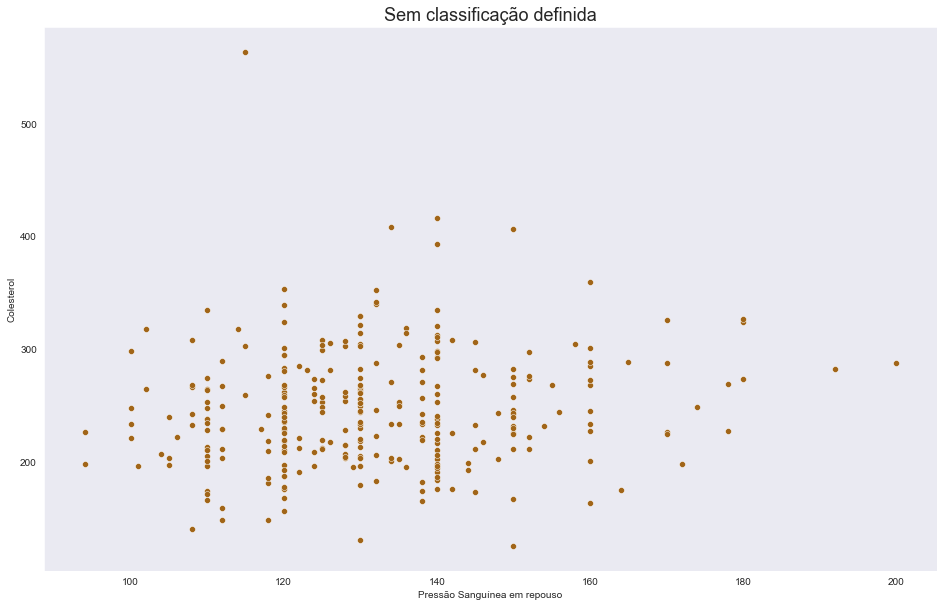

In [13]:
ax = sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)
ax.set_title('Sem classificação definida', fontsize=18)
ax.set_ylabel('Colesterol')
ax.set_xlabel('Pressão Sanguínea em repouso')
ax.figure.set_size_inches(16, 10)

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 2711)
modelo = colesterol.select_dtypes('int64')
kmeans.fit(modelo)

KMeans(n_clusters=3, random_state=2711)

In [22]:
colesterol['clusters'] = kmeans.labels_
colesterol.replace({'clusters': '1'}, {'clusters': 'A'}, regex=True)
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,0
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,1
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,0
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,0
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,2


In [19]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    251.924812
1    321.274194
2    197.435185
Name: colesterol, dtype: float64

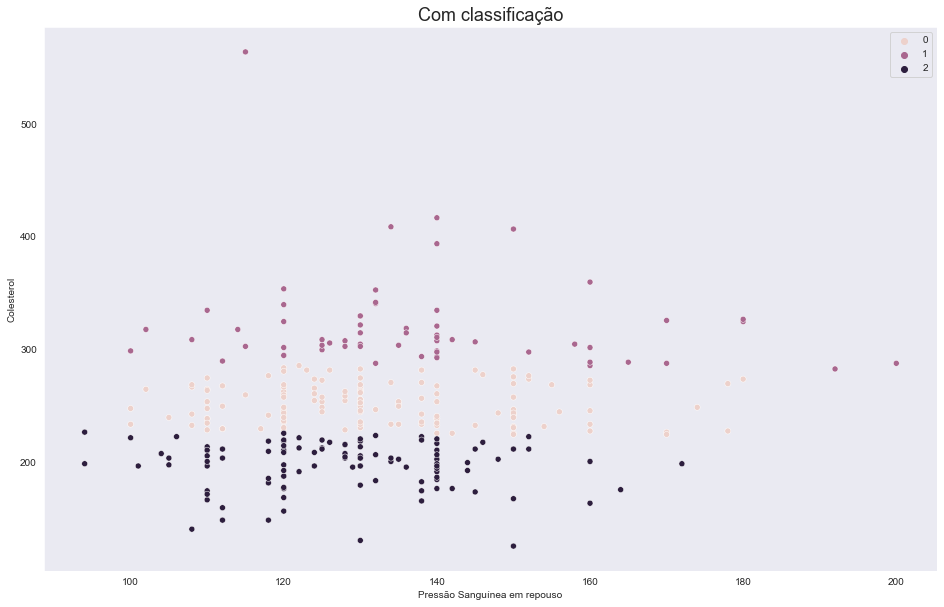

In [18]:
ax = sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data= colesterol, hue = kmeans.labels_)
ax.set_title('Com classificação', fontsize=18)
ax.set_ylabel('Colesterol')
ax.set_xlabel('Pressão Sanguínea em repouso')
ax.figure.set_size_inches(16, 10)